### Autor: Carlos Eduardo Fontaneli
### RA: 769949

#### Base de dados: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign


In [1]:
# Importando bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

### Descrição do Conjunto de Dados

O conjunto de dados escolhido é relativo a dados de clientes de um determinado empresa em relação a seus hábitos de consumo e suas respostas as campanhas de marketing elaboradas pela empresa.
O principal objetivo do conjunto de dados é entender o comportamento dos clientes e suas reações a determinadas campanhas que a empresa faz, para que assim os produtos e camapanhas sejam direcionados aos clientes de acordo com suas necessidades.
Para tanto o conjunto de dados conta com atributos como: nivel de escolaridade dos clientes, estado civil, renda, quantidade de crianças em casa entre outros dados.


In [2]:
# Conjunto de Dados
dataset = pd.read_csv("Data/marketing_campaign.csv", sep="\t")
dataset.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Análise Exploratória dos Dados

Nessa etapa, foram analisados os tipos de dados e a formas como os mesmo estão expressos dentro do conjunto.


In [3]:
dataset.describe()


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Pré-processamento dos dados e engenharia de atributos

Nesta etapa, foram aplicadas algumas técnicas de pré-processamento dos dados e engenharia de atributos como remoção, unificação e transformação de dados.


In [5]:
# Removendo as colunas onde os dados sao todos iguais e o ID
dataset = dataset.drop(columns=["Z_CostContact", "Z_Revenue", 'ID'], axis=1)

In [6]:
# Conferindo os valores únicos das variáveis nominais
print(dataset['Education'].unique())
print(dataset['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [7]:
# Trocando os valores vazios de renda pela media do dataset
dataset['Income'] = dataset['Income'].fillna(dataset['Income'].median())

In [8]:
# Simplificando os valores do estado civil e educacao para valores numéricos
dataset['Marital_Status'] = dataset['Marital_Status'].replace(
    ['Married', 'Together'], 1)
dataset['Marital_Status'] = dataset['Marital_Status'].replace(
    ['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd', 'Single'], 0)
dataset['Education'] = dataset['Education'].replace(
    ['Basic', '2n Cycle'], 0)
dataset['Education'] = dataset['Education'].replace(
    ['Master', 'Postgraduate', 'Graduation', 'PhD'], 1)
dataset.head()

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0        1957          1               0  58138.0        0         0   
1        1954          1               0  46344.0        1         1   
2        1965          1               1  71613.0        0         0   
3        1984          1               1  26646.0        1         0   
4        1981          1               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  04-09-2012       58       635         88  ...                   10   
1  08-03-2014       38        11          1  ...                    1   
2  21-08-2013       26       426         49  ...                    2   
3  10-02-2014       26        11          4  ...                    0   
4  19-01-2014       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [9]:
# Convertendo os dados de tempo para formato de data e utilizando apenas o ano
dataset["Dt_Customer"] = pd.to_datetime(
    dataset["Dt_Customer"], infer_datetime_format=True, dayfirst=True)
dates = []
for i in dataset["Dt_Customer"]:
    i = i.date().year
    dates.append(i)

dataset["Dt_Customer"] = dates
dataset["Dt_Customer"].head()

0    2012
1    2014
2    2013
3    2014
4    2014
Name: Dt_Customer, dtype: int64

In [10]:
# Convertendo o atributo ano de nascimento pela idade do cliente
dataset["Age"] = 2022-dataset["Year_Birth"]
dataset = dataset.drop(columns='Year_Birth', axis=1)

# Unificando os gastos em produtos para apenas uma coluna coluna geral de gastos totais
dataset["Spent"] = dataset["MntWines"] + \
    dataset["MntFruits"] + \
    dataset["MntMeatProducts"] + \
    dataset["MntFishProducts"] + \
    dataset["MntSweetProducts"] + \
    dataset["MntGoldProds"]

# Unificando as compras em apenas uma coluna de compras totais
dataset["Purchases"] = dataset["NumDealsPurchases"] + \
    dataset["NumWebPurchases"] + \
    dataset["NumCatalogPurchases"] + \
    dataset["NumStorePurchases"]

# Quantificando a quantidade de filhos num mesmo cliente
dataset["Children"] = dataset["Kidhome"] + dataset["Teenhome"]
dataset = dataset.drop(columns=['Kidhome', 'Teenhome'], axis=1)

# Removendo possiveis outliers
dataset = dataset[(dataset["Age"] < 90)]
dataset = dataset[(dataset["Income"] < 600000)]

dataset.head()

Education  Marital_Status   Income  Dt_Customer  Recency  MntWines  \
0          1               0  58138.0         2012       58       635   
1          1               0  46344.0         2014       38        11   
2          1               1  71613.0         2013       26       426   
3          1               1  26646.0         2014       26        11   
4          1               1  58293.0         2014       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         88              546              172                88  ...   
1          1                6                2                 1  ...   
2         49              127              111                21  ...   
3          4               20               10                 3  ...   
4         43              118               46                27  ...   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Age  Spent  Purchases  Children  
0   65   1617         25         0  
1   68     27          6         2  
2   57    776         21         0  
3   38     53          8         1  
4   41    422         19         1  

[5 rows x 27 columns]

# Visualização N-dimesional

<Figure size 2000x2000 with 0 Axes>

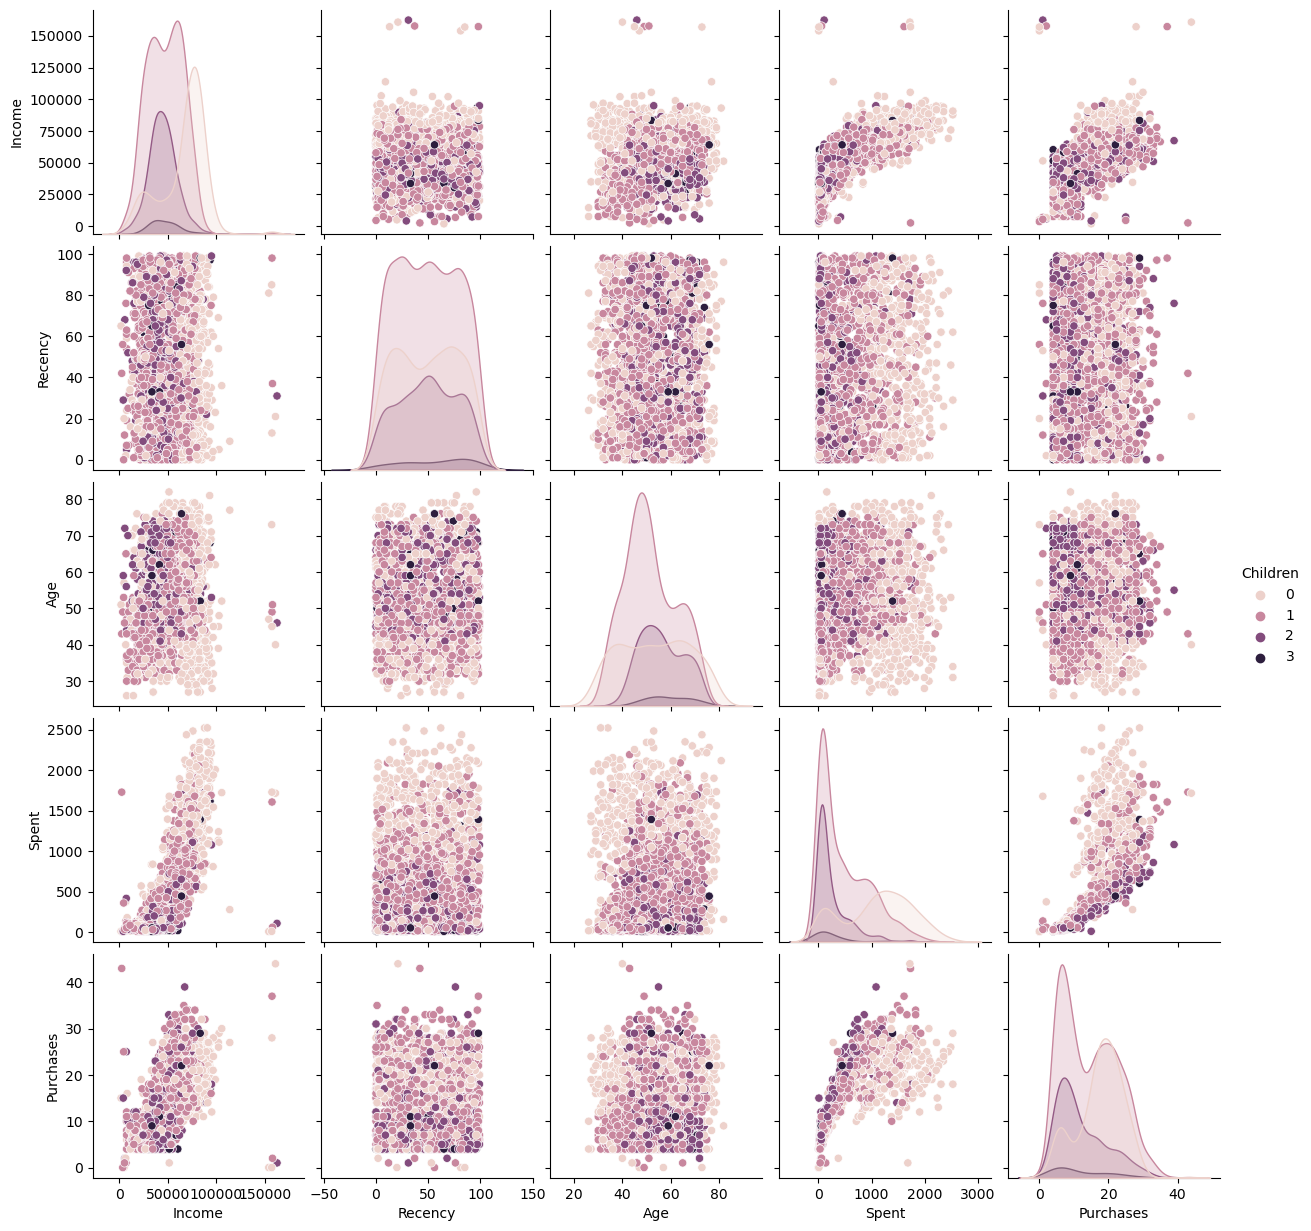

In [11]:
# Plotando os principais atributos do dataset em pares e relacionados a quantidade de filhos de cada cliente
plot = ["Income", "Recency", "Age", "Spent", "Children", "Purchases"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue="Children")
_ = plt.show()


<Figure size 2000x2000 with 0 Axes>

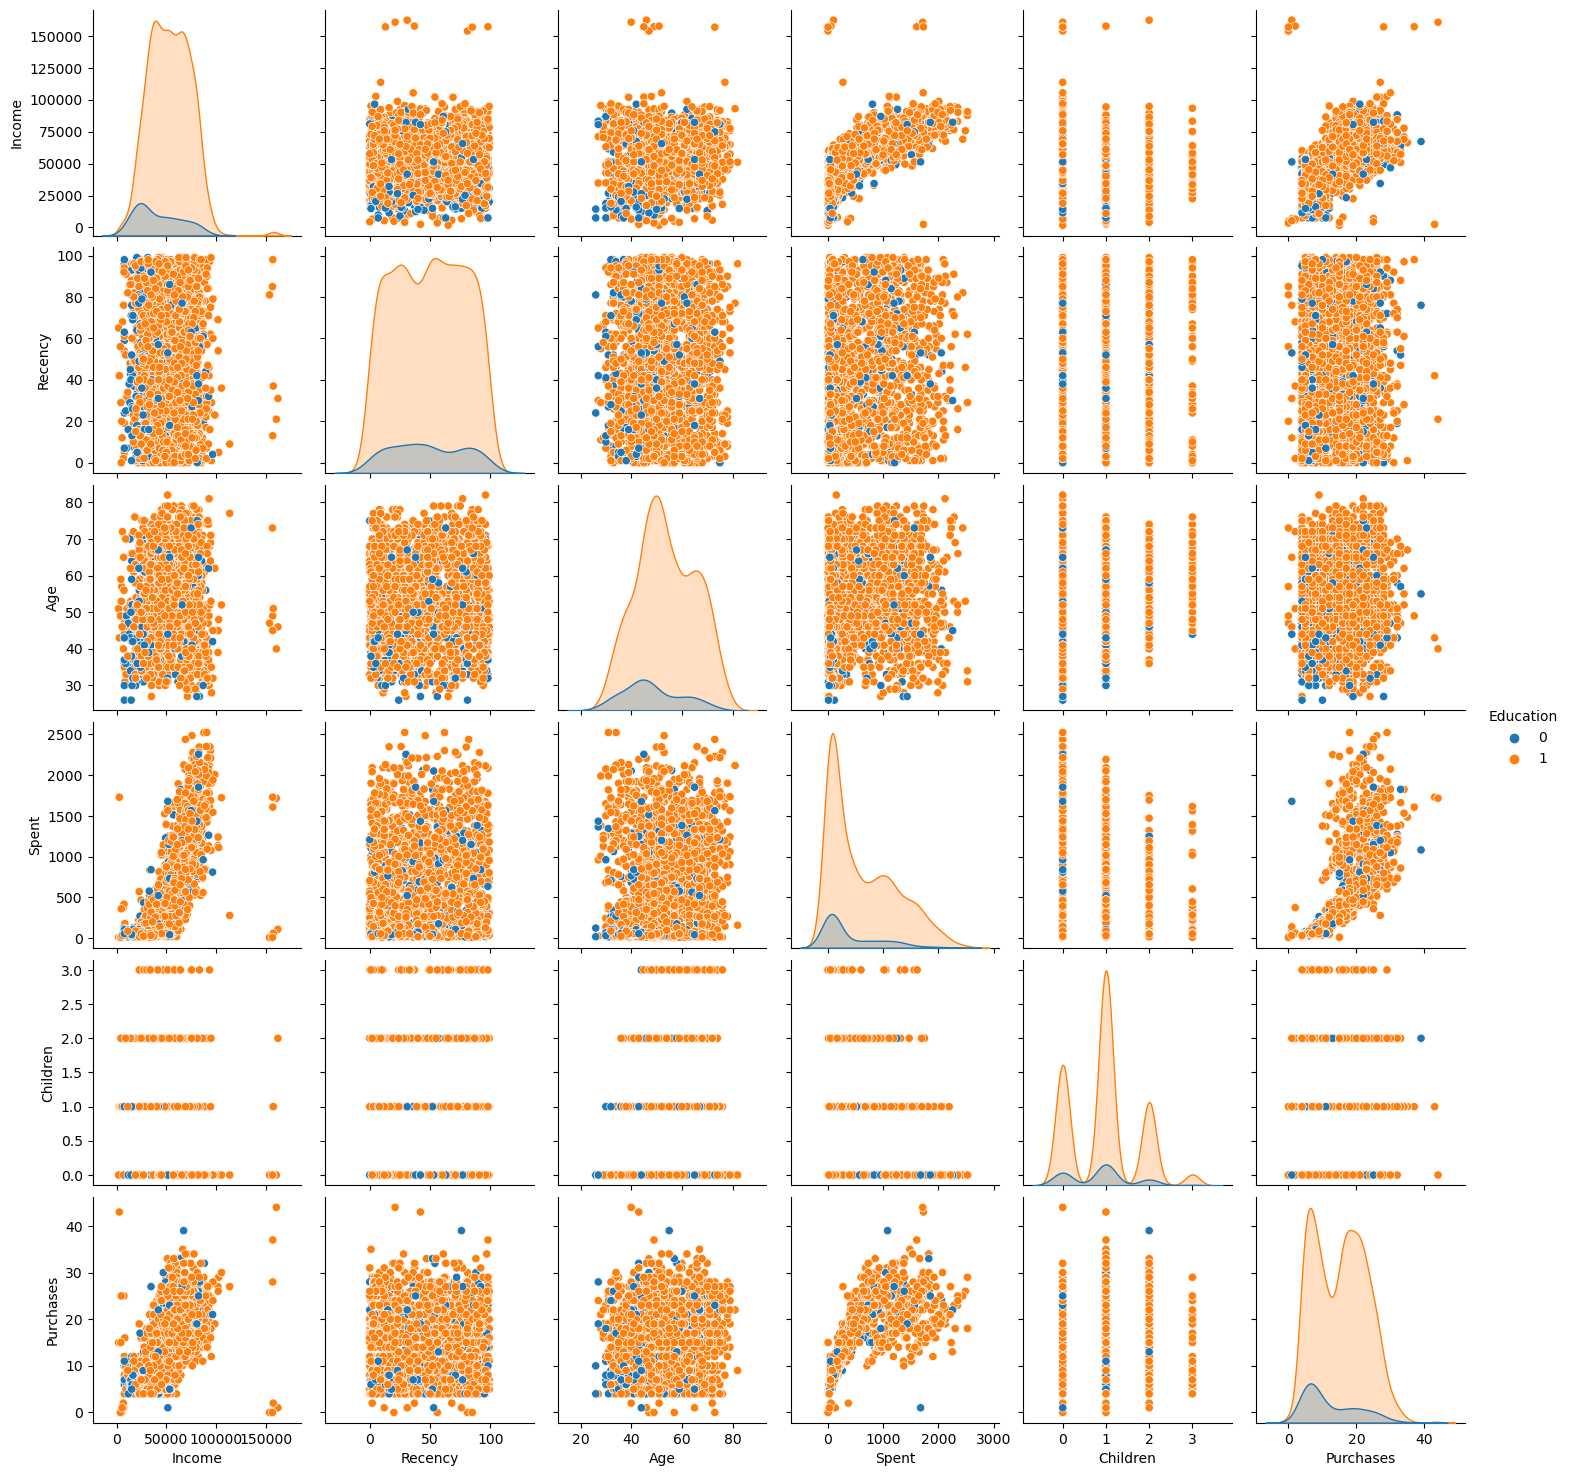

In [12]:
# Plotando os principais atributos do dataset em pares e relacionados a educação de cada cliente
plot = ["Income", "Recency", "Age", "Spent", "Children", "Purchases", "Education"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue="Education")
_ = plt.show()

<Figure size 2000x2000 with 0 Axes>

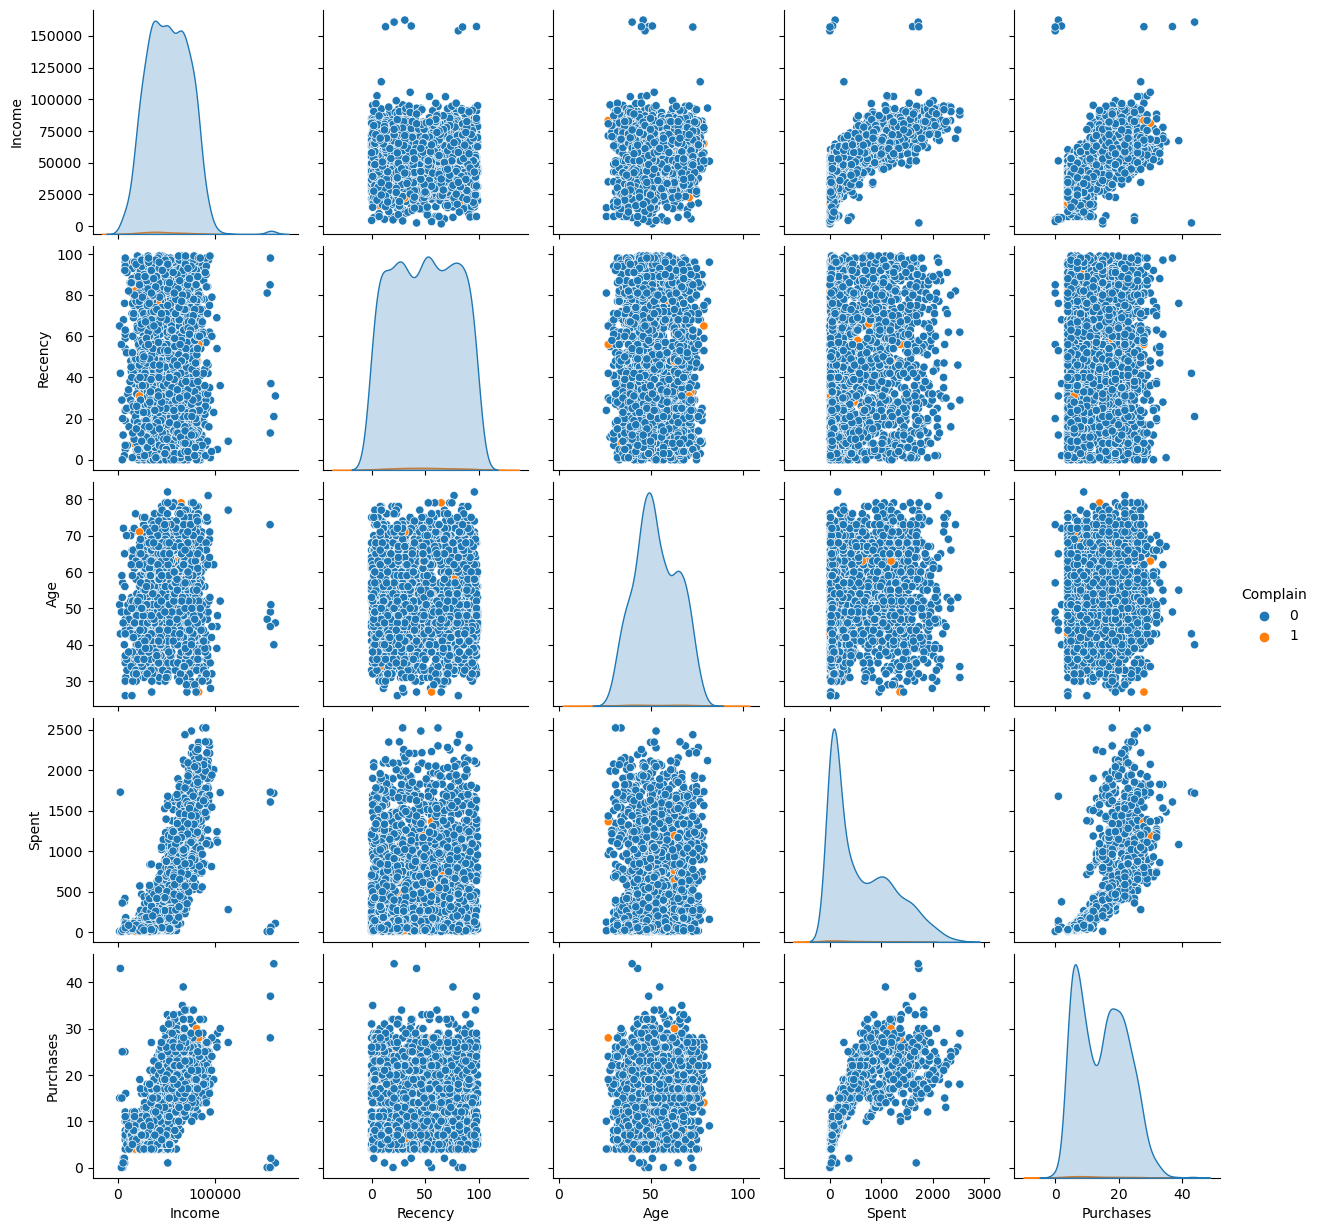

In [13]:
# Plotando os principais atributos do dataset em pares e relacionados se o cliente ja reclamou alguma vez
plot = ["Income", "Recency", "Age", "Spent", "Purchases", "Complain"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue="Complain")
# Taking hue
_ = plt.show()


<Figure size 2000x2000 with 0 Axes>

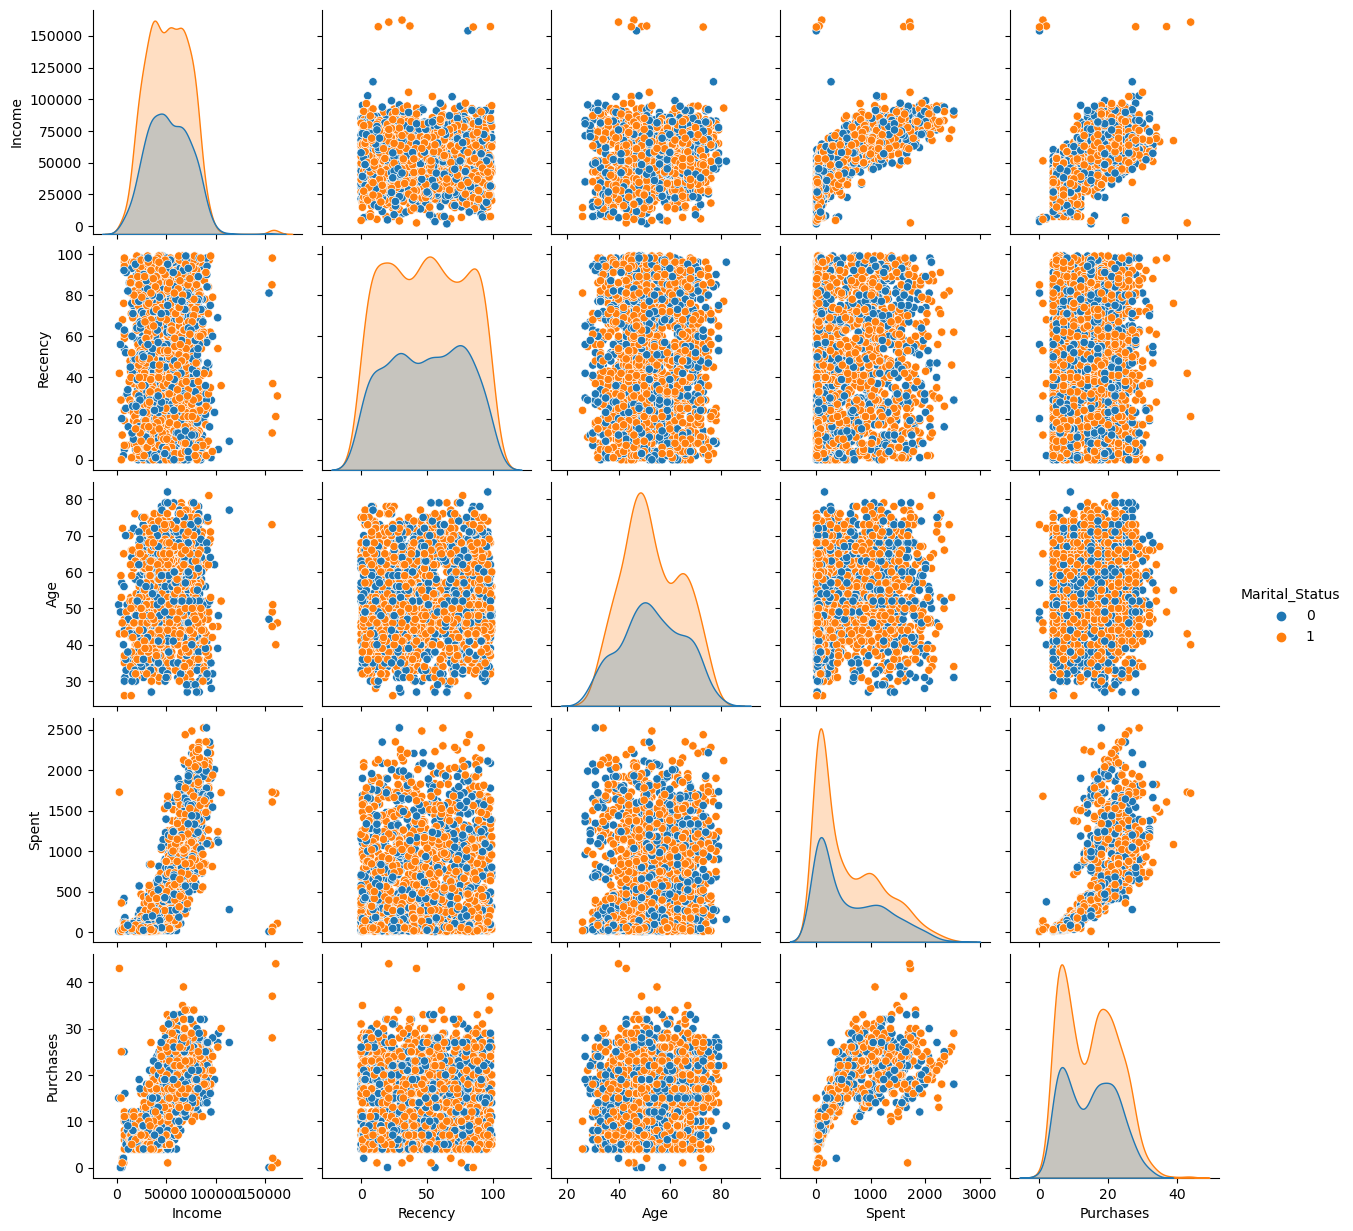

In [14]:
# Plotando os principais atributos do dataset em pares e relacionados ao estado civil do cliente
To_Plot = ["Income", "Recency", "Age", "Spent", "Purchases", "Marital_Status"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[To_Plot], hue="Marital_Status")
# Taking hue
_ = plt.show()

### Plotagem 3D com projeção

Através do uso da projeção é possível criar um gráfico 3D que exibe até 3 dimensões de informação do dataset. Ademais, com a utilização da cor é possível colocar uma quarta informação no gráfico.

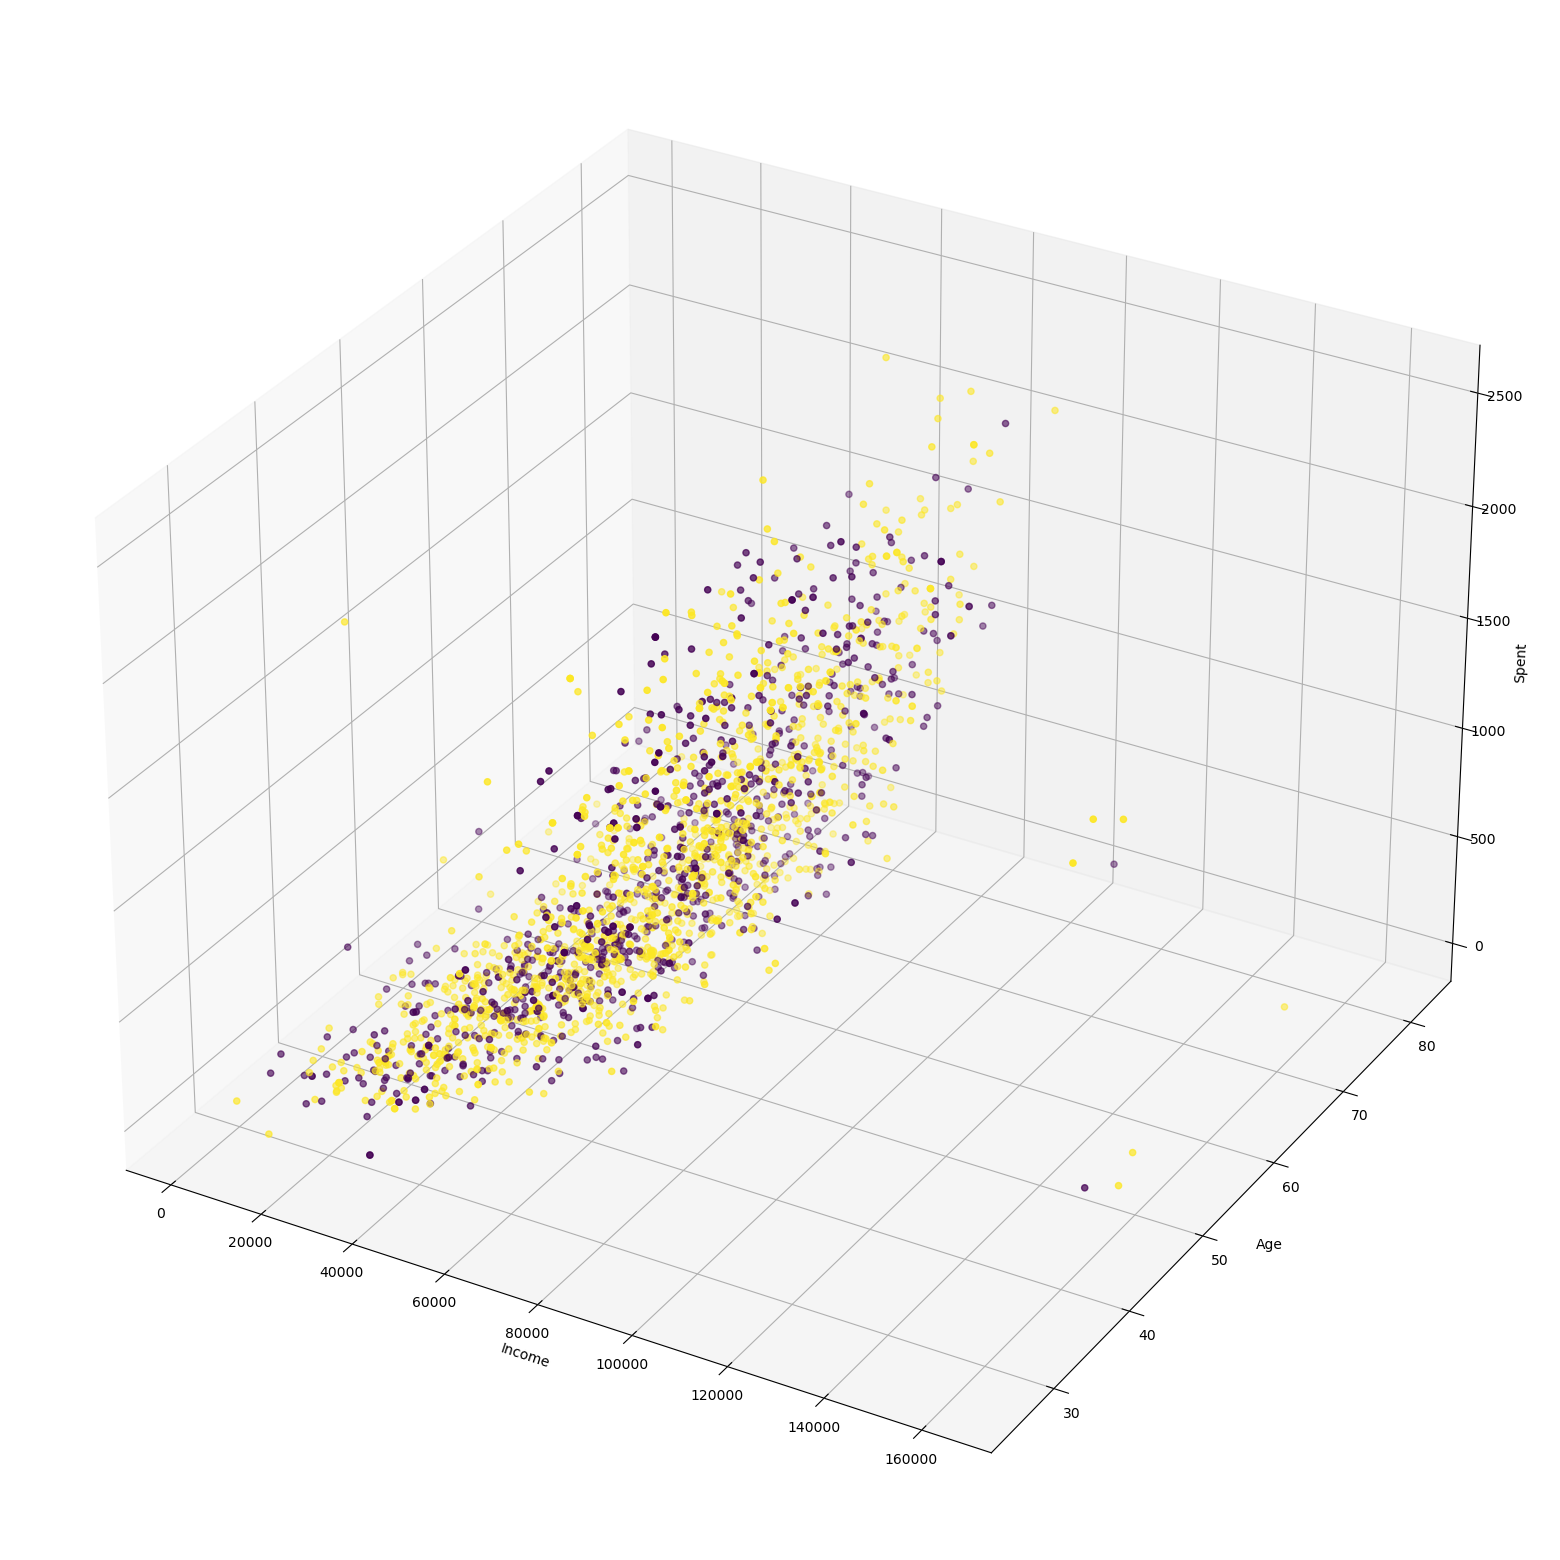

In [15]:
# Plotando os dados reduzidos
To_Plot = ["Income", "Age", "Spent"]
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spent')
ax.scatter(dataset[To_Plot[0]],
           dataset[To_Plot[1]],
           dataset[To_Plot[2]],
           c=dataset['Marital_Status'],
           marker="o")

plt.show()


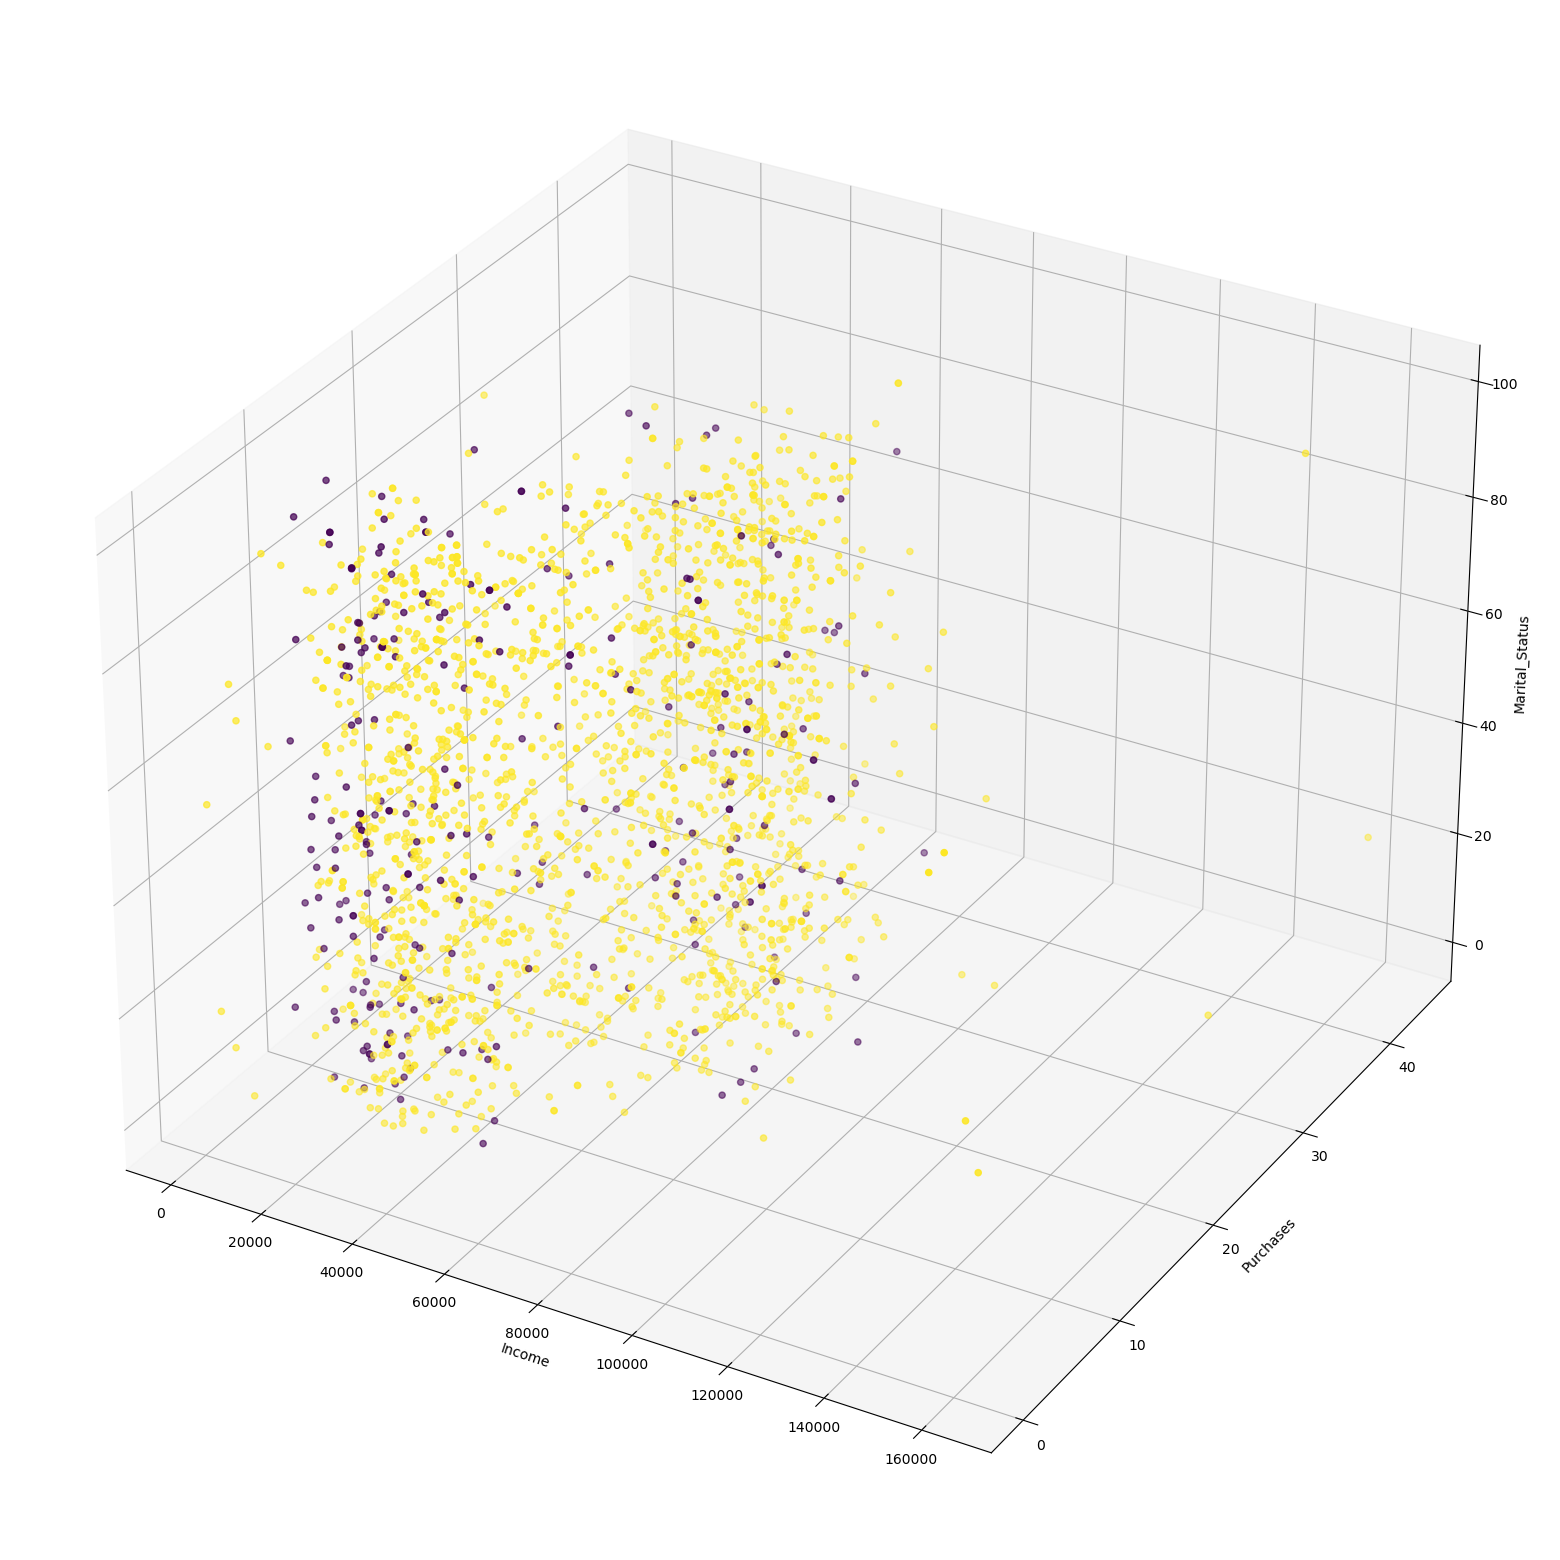

In [16]:
# Plotando os dados reduzidos
To_Plot = ["Income", "Purchases", "Recency"]
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel('Income')
ax.set_ylabel('Purchases')
ax.set_zlabel('Marital_Status')
ax.scatter(dataset[To_Plot[0]],
           dataset[To_Plot[1]],
           dataset[To_Plot[2]],
           c=dataset['Education'],
           marker="o")

plt.show()


### Gráficos com coordenadas paralelas

Com a utilização de gráficos com coordenadas paralelas é possível criar gráficos com quantas dimensões forem necessárias, além de traçar diversos gráficos de linhas, ele também se utiliza da cor como uma escala de informação.

In [17]:
plot = ["Income", "Recency", "Age", "Spent", "Children", "Purchases", 'Marital_Status', 'Education']


fig = px.parallel_coordinates(dataset[plot], 
                              color='Purchases',
                              range_color = [0,44],
                              labels={"Income": "Income",
                                      "Recency": "Recency",
                                      "Age": "Age",
                                      "Spent": "Spent",
                                      "Children": "Children",
                                      "Marital_Status": "Marital_Status",
                                      'Education':'Education'},
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2)
fig.show()

#### a) o que você aprendeu com esta atividade? 
Aprendi diferentes formas de representação visual de n-dimensões e a trabalhar com gráficos com coordenadas paralelas.

#### b) como aprimorar o que você já fez?
Buscar técnicas de trabalhar com as formas dos pontos nos gráficos de dispersão, dessa forma seria possível adicionar mais uma dimensão de informação a eles.